# Tổng hợp Kết quả Nghiên cứu - 10 Mô hình Baseline
### Pipeline: Tự động đọc dữ liệu từ thư mục `Result/` và trực quan hóa so sánh.

**Mục tiêu:**
- Đọc file `report.json` của từng mô hình.
- So sánh các chỉ số Classification (Accuracy, F1-Score).
- So sánh các chỉ số Regression (MSE, RMSE, R2 Score).
- Trực quan hóa bằng biểu đồ bar chart và heatmap tổng hợp.

In [4]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cấu hình đường dẫn
BASE_PATH = r'd:\HUTECH\AI\DeepLearning\DAHS\MangoLeaf'
RESULT_PATH = os.path.join(BASE_PATH, 'Result')

def load_results(path):
    all_data = []
    if not os.path.exists(path):
        print(f'LỖI: Thư mục {path} không tồn tại!')
        return None
    
    for m_name in os.listdir(path):
        r_file = os.path.join(path, m_name, 'report.json')
        if os.path.exists(r_file):
            with open(r_file, 'r') as f:
                try:
                    data = json.load(f)
                    reg = data.get('regression_metrics', {})
                    all_data.append({
                        'Model': m_name,
                        'Accuracy': reg.get('accuracy', 0),
                        'MSE': reg.get('mse', 0),
                        'RMSE': reg.get('rmse', 0),
                        'R2_Score': reg.get('r2_score', 0),
                        'Macro_F1': data.get('macro avg', {}).get('f1-score', 0)
                    })
                except:
                    continue
    return pd.DataFrame(all_data)

df = load_results(RESULT_PATH)

if df is not None and not df.empty:
    df = df.sort_values(by='Accuracy', ascending=False)
    print('>>> Đã tải kết quả của', len(df), 'mô hình.')
    display(df.style.background_gradient(subset=['Accuracy', 'R2_Score'], cmap='viridis'))
else:
    print('Chưa có dữ liệu trong thư mục Result! Vui lòng chạy các cell training trước.')

>>> Đã tải kết quả của 10 mô hình.


,Model,Accuracy,MSE,RMSE,R2_Score,Macro_F1
8,ShuffleNetV2,1.000000,0.000000,0.000000,1.000000,1.000000
4,MobileNetV2,1.000000,0.000000,0.000000,1.000000,1.000000
7,ResNet50,0.997222,0.025000,0.158114,0.996225,0.997222
1,ConvNeXt_Tiny,0.997222,0.025000,0.158114,0.996225,0.997222
5,MobileNetV3,0.997222,0.025000,0.158114,0.996225,0.997222
3,EfficientNetV2,0.997222,0.025000,0.158114,0.996225,0.997222
6,ResNet18,0.997222,0.025000,0.158114,0.996225,0.997222
0,AlexNet,0.994444,0.027778,0.166667,0.995805,0.994408
2,DenseNet121,0.991667,0.163889,0.404832,0.975251,0.991628
9,SimpleCNN,0.897222,1.622222,1.273665,0.755029,0.896597


### 1. So sánh các chỉ số Classification (Accuracy & F1-Score)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19860\2506951089.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='Accuracy', palette='Blues_r')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19860\2506951089.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='Macro_F1', palette='Greens_r')


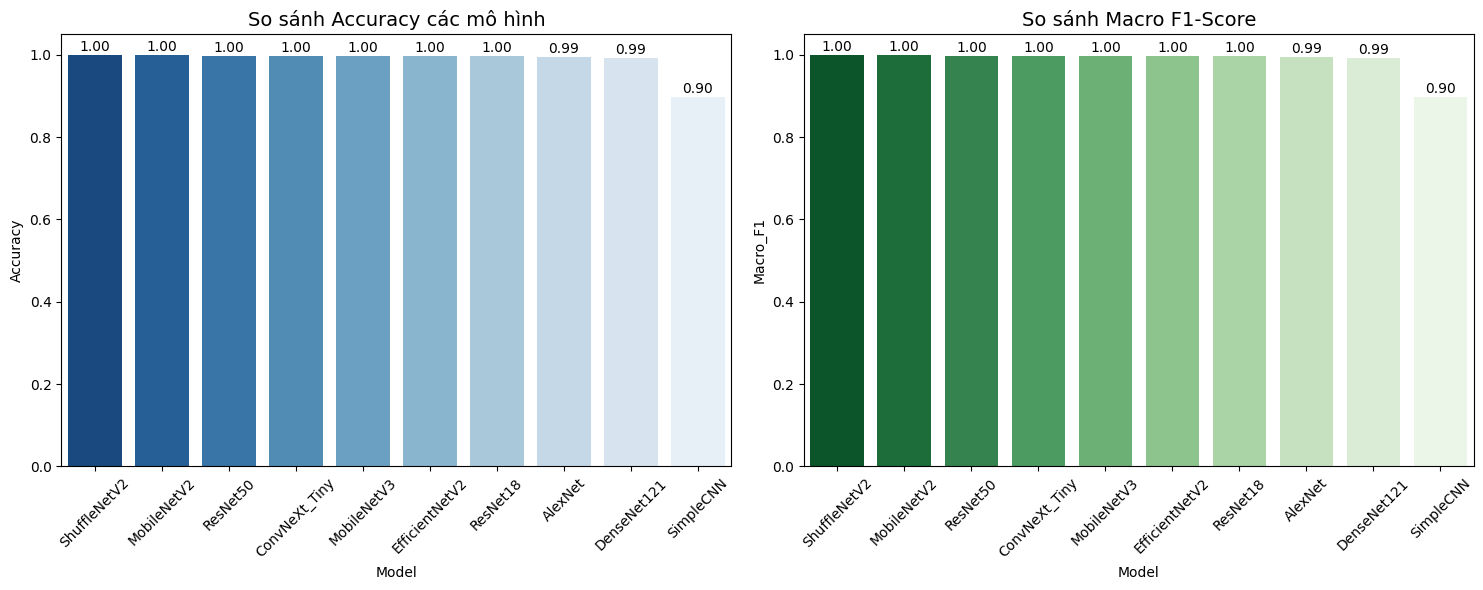

In [5]:
if df is not None and not df.empty:
    plt.figure(figsize=(15, 6))
    
    # Bar chart cho Accuracy
    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x='Model', y='Accuracy', palette='Blues_r')
    plt.title('So sánh Accuracy các mô hình', fontsize=14)
    plt.xticks(rotation=45)
    for i, v in enumerate(df['Accuracy']): 
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
    
    # Bar chart cho Macro F1
    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x='Model', y='Macro_F1', palette='Greens_r')
    plt.title('So sánh Macro F1-Score', fontsize=14)
    plt.xticks(rotation=45)
    for i, v in enumerate(df['Macro_F1']): 
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
        
    plt.tight_layout()
    plt.show()

### 2. So sánh các chỉ số Regression (MSE, RMSE, R2 Score)
*Lưu ý: MSE thấp hơn là tốt hơn, R2 cao hơn là tốt hơn.*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19860\3966302924.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.sort_values('MSE'), x='Model', y='MSE', ax=axes[0], palette='Reds')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19860\3966302924.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Model', y='R2_Score', ax=axes[1], palette='Purples_r')


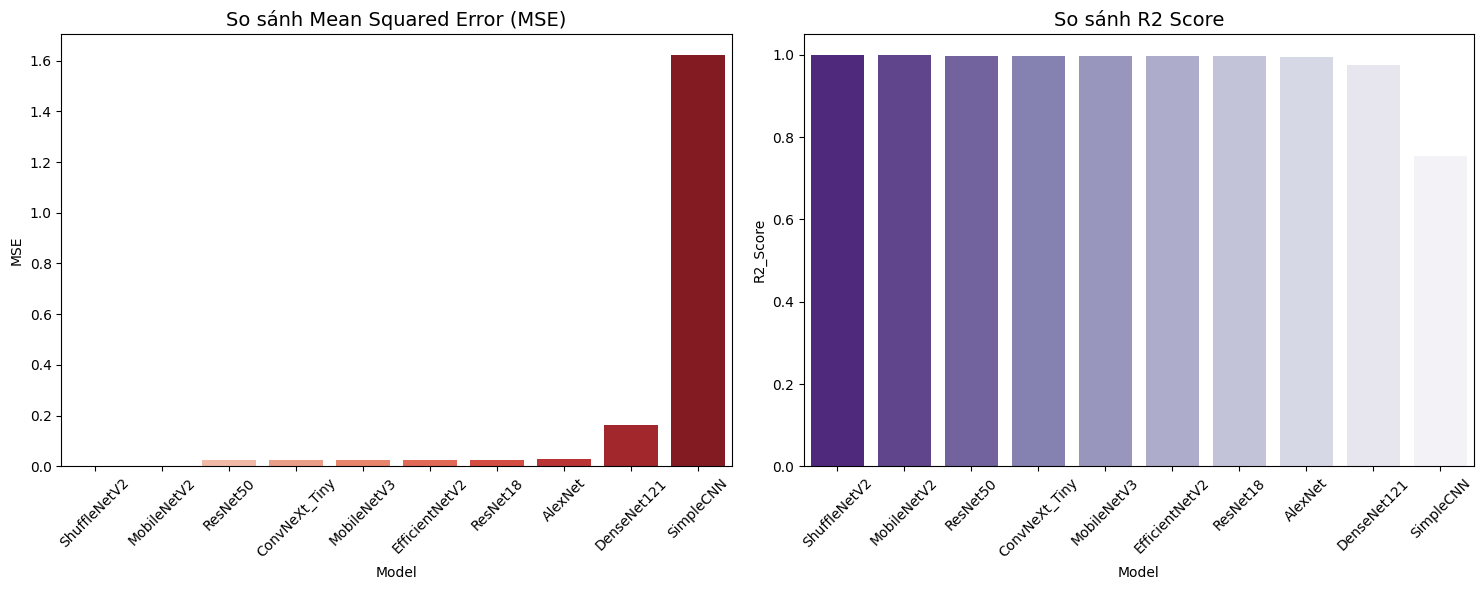

In [6]:
if df is not None and not df.empty:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # MSE Comparison
    sns.barplot(data=df.sort_values('MSE'), x='Model', y='MSE', ax=axes[0], palette='Reds')
    axes[0].set_title('So sánh Mean Squared Error (MSE)', fontsize=14)
    axes[0].tick_params(axis='x', rotation=45)
    
    # R2 Score Comparison
    sns.barplot(data=df, x='Model', y='R2_Score', ax=axes[1], palette='Purples_r')
    axes[1].set_title('So sánh R2 Score', fontsize=14)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()